In [1]:
%%javascript
$(document).ready(() => {
    // Удаление данного блока кода с конечного результата.
    $('div.code_cell').first().css('display', 'none');

    // Включение автоматического переноса слов в параграфе.
    $('div.text_cell p').css('hyphens', 'auto');

    // Включение растягивания текста на всю доступную длину.
    $('div.text_cell p').css('text-align', 'justify');
});

<IPython.core.display.Javascript object>

<h3><b>Лабораторная работа №8: Выявление аномалий</b></h3>

<p lang="ru">Выявление аномалий — это опознавание во время интеллектуального анализа данных редких значений, событий или наблюдений, которые вызывают подозрения ввиду существенного отличия от большей части данных в рассматриваемой выборке. Обычно аномальные данные превращаются в некоторый вид проблемы, такой как мошенничество в банке, структурный дефект, медицинские проблемы или ошибки в тексте. Аномалии также упоминаются как выбросы, шум в данных, отклонения или исключения.</p>

In [2]:
%autosave 300

Autosaving every 300 seconds


In [3]:
import warnings

# Игнорирование некоторых оповещающих сообщений библиотек.
warnings.filterwarnings('ignore', category=FutureWarning)

In [4]:
import numpy as np

In [5]:
# Импортирование функции для чтения MATLAB файлов.
from scipy.io import loadmat

In [6]:
# Импортирование библиотеки для работы с графиками.
from matplotlib import pyplot
%matplotlib inline

In [7]:
# Установка начального значения для генератора случайных чисел.
# Данное действие требуется для воспроизведения результатов опыта.
np.random.seed(0)

<p lang="ru"><b>Пункт №1:&nbsp;</b>Загрузка первого предоставленного набора данных <tt>ex8data1.mat</tt> при помощи внешней библиотеки scipy. Текущий набор данных содержит информацию о задержке и пропускной способности серверов. Набор разделен на обучающую выборку, которая не содержит меток классов, а также валидационную, на которой необходимо оценить качество алгоритма выявления аномалий.</p>

In [8]:
data = loadmat('./datasets/ex8data1.mat')

In [9]:
# Создание тренировочной выборки.
data_x = np.array(data['X'])

# Создание валидационной выборки.
valid_x = np.array(data['Xval'])
valid_y = np.array(data['yval']).ravel()

<p lang="ru"><b>Пункт №2:&nbsp;</b>Построение графика зависимости задержки серверов от его пропускной способности. Всякую зависимость между двумя типами данных хорошо показывает диаграмма разброса значений. Ко всему прочему, с помощью этой диаграммы можно определить корреляцию между каким-либо параметром качества и влияющим на него фактором.</p>

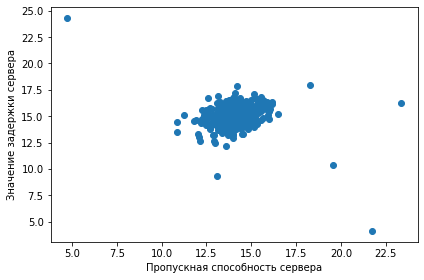

In [10]:
# Построение точечной диаграммы разброса данных.
pyplot.scatter(data_x[:, 0], data_x[:, 1])

# Настройка координатных осей графика.
pyplot.xlabel('Пропускная способность сервера')
pyplot.ylabel('Значение задержки сервера')

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

<p lang="ru"><b>Пункт №3:&nbsp;</b>Вычисление основных числовых характеристик нормального закона расспределения. Каждая случайная величина полностью определяется своей функцией распределения. В то же время при решении практических задач достаточно знать несколько числовых параметров, которые позволяют представить основные особенности случайной величины в сжатой форме. К таким величинам как раз и относятся математическое ожидание и ковариационная матрица случайной величины.</p>

In [11]:
def estimate_gaussian(x):
    # Вычисление значения мат. ожидания.
    mu = np.mean(x, axis=0)

    # Вычисление ковариационной матрицы.
    cov = np.cov(x.T, ddof=0)

    return mu, cov

In [12]:
# Вычисление основных числовых характеристик.
mean, sigma = estimate_gaussian(data_x)

<p lang="ru"><b>Пункт №4:&nbsp;</b>Реализация функции вычисления плотности вероятности случайной величины для многомерного нормального закона расспределения. Плотность вероятности — один из способов задания распределения случайной величины. Во многих практических приложениях понятия плотность вероятности и плотность случайной величины или функция распределения вероятностей фактически синонимизируются и под ними подразумевается вещественная функция, характеризующая сравнительную вероятность реализации тех или иных значений случайной переменной.</p>

In [13]:
def calc_density(x, mu, cov):
    # Нормировка данных.
    x = x - mu

    # Вычисление основания многомерного нормального закона распределения.
    base = 1 / (np.power(2 * np.pi, mu.shape[0] / 2) * np.sqrt(np.linalg.det(cov)))

    # Вычисление степени многомерного нормального закона распределения.
    power = np.exp(-0.5 * np.sum(x.dot(np.linalg.inv(cov)) * x, axis=1))

    # Вычисление функции плотности вероятности.
    return base * power

<p lang="ru"><b>Пункт №5:&nbsp;</b>Построение графика зависимости задержки серверов от его пропускной способности и контуры вероятностей значений. Всякую зависимость между двумя типами данных хорошо показывает диаграмма разброса значений. Ко всему прочему, с помощью этой диаграммы можно определить корреляцию между каким-либо параметром качества и влияющим на него фактором. Данное действие необходимо для визуальной оценки аномальных значений.</p>

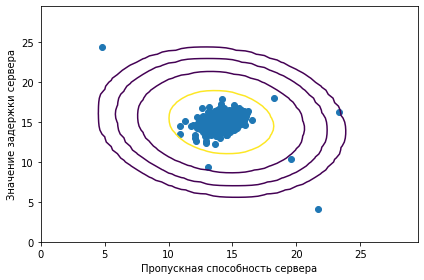

In [14]:
# Настройка координатных осей графика.
pyplot.xlabel('Пропускная способность сервера')
pyplot.ylabel('Значение задержки сервера')

# Генерация прямоугольной сетки для построения линий.
x, y = np.meshgrid(np.arange(0, 30, 0.5),
                   np.arange(0, 30, 0.5))

# Подготовка значений для вычисления вероятности.
xy = np.transpose([x.ravel(), y.ravel()])

# Вычисление результатов для рассматриваемых значений.
out = calc_density(xy, mean, sigma).reshape(x.shape)

# Построение точечной диаграммы разброса данных.
pyplot.scatter(data_x[:, 0], data_x[:, 1])

# Построение разделяющей линии нормального распределения.
pyplot.contour(x, y, out, levels=[1e-12, 1e-9, 1e-6, 1e-3])

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

<p lang="ru"><b>Пункт №6:&nbsp;</b>Вычисление оптимального значения порога обнаружения аномалий в наборе данных <tt>ex8data1.mat</tt> с помощью нормального закона распределения. Для такого подбора используется алгоритм исчерпывающего поиска по указанным значениям параметра. Данный алгоритм перебирает все возможные значения порога и выбирает тот порог, при котором достигается наивысшая точность алгоритма.</p>

In [15]:
def calc_threshold(y, prob):
    # Контрольный порог.
    best_threshold = 0

    # Контрольная F1-мера.
    best_f1 = 0

    # Запуск исчерпывающего поиска по указанным значениям шагов.
    for threshold in np.linspace(prob.max(), prob.min(), 30000):
        res = prob < threshold

        # Вычисление значений матрицы ошибок.
        tp = np.sum((y == 1) & (res == 1))
        fp = np.sum((y == 0) & (res == 1))
        fn = np.sum((y == 1) & (res == 0))

        # Контроль нулевых значений для устранения ошибок.
        if tp + fp == 0 or tp + fn == 0:
            continue

        # Вычисление значений точности и полноты.
        precision = tp / (tp + fp)
        recall = tp / (tp + fn)

        # Вычисление значения F1-меры.
        f1 = 2 * precision * recall / (precision + recall)

        # Обновление контрольных значений.
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    return best_threshold, best_f1

In [16]:
# Вычисление плотности вероятности рассматриваемых данных.
prob_value = calc_density(valid_x, mean, sigma)

In [17]:
# Вычисление наилучшего порога для контрольного набора данных.
threshold_value, f1_value = calc_threshold(valid_y, prob_value)

In [18]:
print('Значение предела:', threshold_value)
print('Значение F1-меры:', f1_value)

Значение предела: 0.000296158349739159
Значение F1-меры: 0.8750000000000001


<p lang="ru"><b>Пункт №7:&nbsp;</b>Построение графика зависимости задержки серверов от его пропускной способности и выделение аномальных значений. Всякую зависимость между двумя типами данных хорошо показывает диаграмма разброса значений. Ко всему прочему, с помощью этой диаграммы можно определить корреляцию между каким-либо параметром качества и влияющим на него фактором. Данное действие необходимо для визуальной оценки корректности работы алгоритма.</p>

In [19]:
# Вычисление результатов для контрольной выборки.
out = calc_density(data_x, mean, sigma) < threshold_value

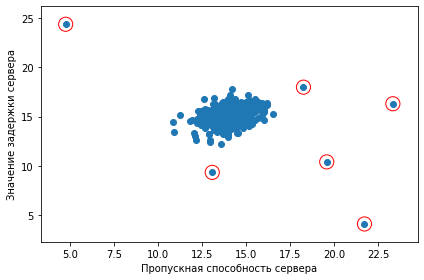

In [20]:
# Построение точечной диаграммы разброса данных.
pyplot.scatter(data_x[:, 0], data_x[:, 1])

# Выделение аномальных значений на графике.
pyplot.scatter(data_x[out, 0],
               data_x[out, 1],
               edgecolors='r',
               s=200,
               facecolors='none')

# Настройка координатных осей графика.
pyplot.xlabel('Пропускная способность сервера')
pyplot.ylabel('Значение задержки сервера')

# Настройка отображения.
pyplot.tight_layout()

# Отображение графика.
pyplot.show()

***

<p lang="ru"><b>Пункт №8:&nbsp;</b>Загрузка второго предоставленного набора данных <tt>ex8data2.mat</tt> при помощи внешней библиотеки scipy. Текущий набор данных содержит информацию о 11-мерных переменных, среди которых необходимо выделить аномальные. Набор разделен на обучающую выборку, которая не содержит меток классов, а также валидационную, на которой необходимо оценить качество алгоритма выявления аномалий.</p>

In [21]:
data = loadmat('./datasets/ex8data2.mat')

In [22]:
# Создание тренировочной выборки.
data_x = np.array(data['X'])

# Создание валидационной выборки.
valid_x = np.array(data['Xval'])
valid_y = np.array(data['yval']).ravel()

<p lang="ru"><b>Пункт №9:&nbsp;</b>Вычисление оптимального значения порога обнаружения аномалий в наборе данных <tt>ex8data2.mat</tt> с помощью нормального закона распределения. Для такого подбора используется алгоритм исчерпывающего поиска по указанным значениям параметра. Данный алгоритм перебирает все возможные значения порога и выбирает тот порог, при котором достигается наивысшая точность алгоритма.</p>

In [23]:
# Вычисление основных числовых характеристик.
mean, sigma = estimate_gaussian(data_x)

In [24]:
# Вычисление плотности вероятности рассматриваемых данных.
prob_value = calc_density(valid_x, mean, sigma)

In [25]:
# Вычисление наилучшего порога для контрольного набора данных.
threshold_value, f1_value = calc_threshold(valid_y, prob_value)

In [26]:
# Вычисление результатов для контрольной выборки.
out = calc_density(data_x, mean, sigma) < threshold_value

In [27]:
print('Значение предела:', threshold_value)
print('Значение F1-меры:', f1_value)

Значение предела: 2.9231789099163797e-19
Значение F1-меры: 0.7368421052631577


In [28]:
# Подсчет количества аномальных значений.
print('Аномалий найдено:', np.sum(out))

Аномалий найдено: 48
